
===== Pipeline pour GC=F =====


[*********************100%***********************]  1 of 1 completed


signal
NEUTRAL    4628
SELL       1131
BUY         596
Name: count, dtype: int64
Nombre de trades générés: 3731
Nombre de trades générés: 3731
Price             Close  fib_0.382  fib_0.618 signal       capital  drawdown  \
Date                                                                           
2026-01-12  4604.299805   4436.640   4323.360   SELL  10722.993346 -0.366958   
2026-01-13  4589.200195   4446.954   4340.046   HOLD  10758.158956 -0.364882   
2026-01-14  4626.299805   4456.224   4345.776   HOLD  10758.158956 -0.364882   
2026-01-15  4616.299805   4459.280   4350.720   HOLD  10758.158956 -0.364882   
2026-01-16  4595.399902   4459.280   4350.720   HOLD  10758.158956 -0.364882   

Price                                          recommendation  
Date                                                           
2026-01-12  Strong SELL signal: RSI=64.6, price near fib_0...  
2026-01-13                             No clear signal - HOLD  
2026-01-14                             N

[*********************100%***********************]  1 of 1 completed
2026-01-18 16:56:02.227 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:02.228 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


signal
NEUTRAL    4852
SELL       1273
BUY         411
Name: count, dtype: int64
Nombre de trades générés: 3865
Nombre de trades générés: 3865
Price              Close     fib_0.382     fib_0.618 signal      capital  \
Date                                                                       
2026-01-12  23733.900391  23379.240141  23116.798922   SELL  7946.475071   
2026-01-13  23709.869141  23384.963883  23120.336898   SELL  7954.521104   
2026-01-14  23471.750000  23384.963883  23120.336898   HOLD  8034.408669   
2026-01-15  23530.019531  23384.963883  23120.336898   HOLD  8034.408669   
2026-01-16  23515.390625  23384.963883  23120.336898   HOLD  8034.408669   

Price       drawdown                                     recommendation  
Date                                                                     
2026-01-12 -0.304662  Strong SELL signal: RSI=65.3, price near fib_0...  
2026-01-13 -0.303958  Strong SELL signal: RSI=60.9, price near fib_0...  
2026-01-14 -0.296967        

2026-01-18 16:56:02.387 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-18 16:56:02.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:02.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:02.391 No runtime found, using MemoryCacheStorageManager
2026-01-18 16:56:02.394 No runtime found, using MemoryCacheStorageManager
2026-01-18 16:56:02.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed


signal
NEUTRAL    4628
SELL       1131
BUY         596
Name: count, dtype: int64
Nombre de trades générés: 3731
Nombre de trades générés: 3731


2026-01-18 16:56:03.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed


signal
NEUTRAL    4852
SELL       1273
BUY         411
Name: count, dtype: int64
Nombre de trades générés: 3865
Nombre de trades générés: 3865


2026-01-18 16:56:03.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.918 Session state does not function when running a script without `streamlit run`
2026-01-18 16:56:03.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56:03.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 16:56

DeltaGenerator()

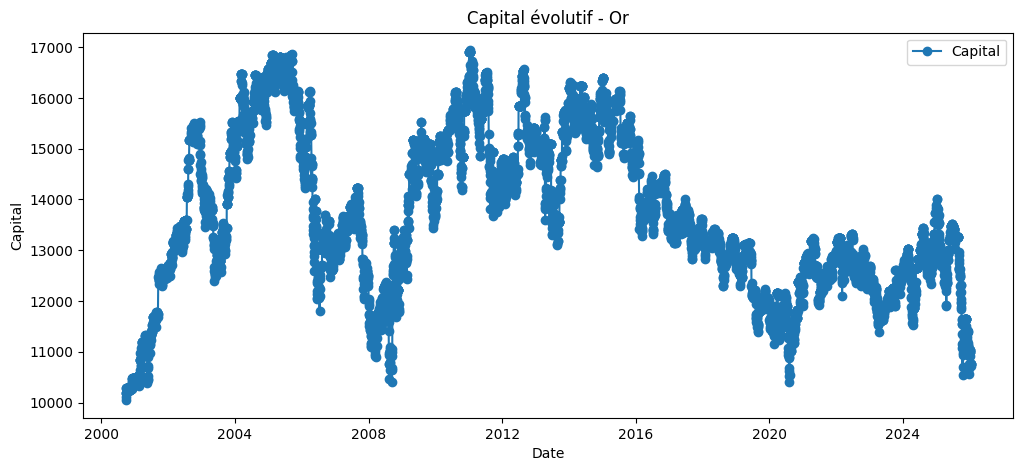

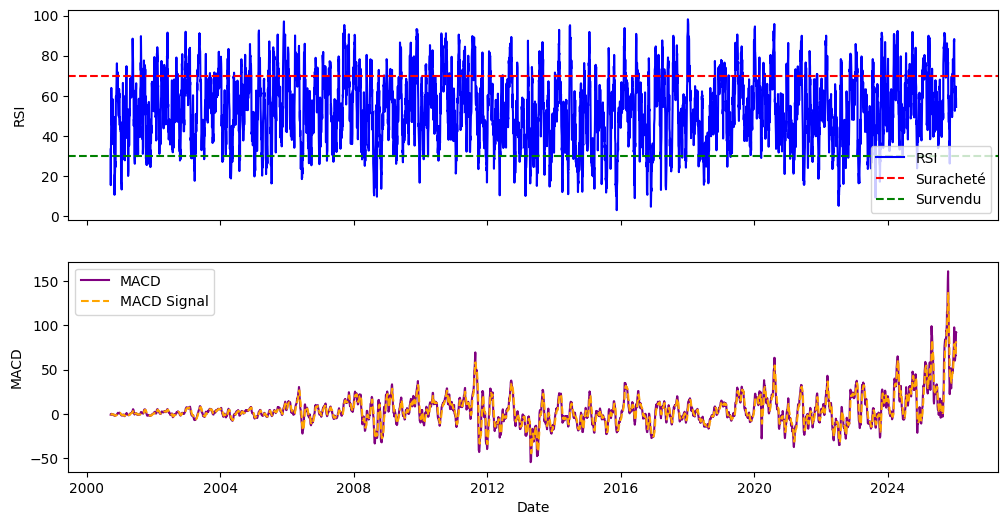

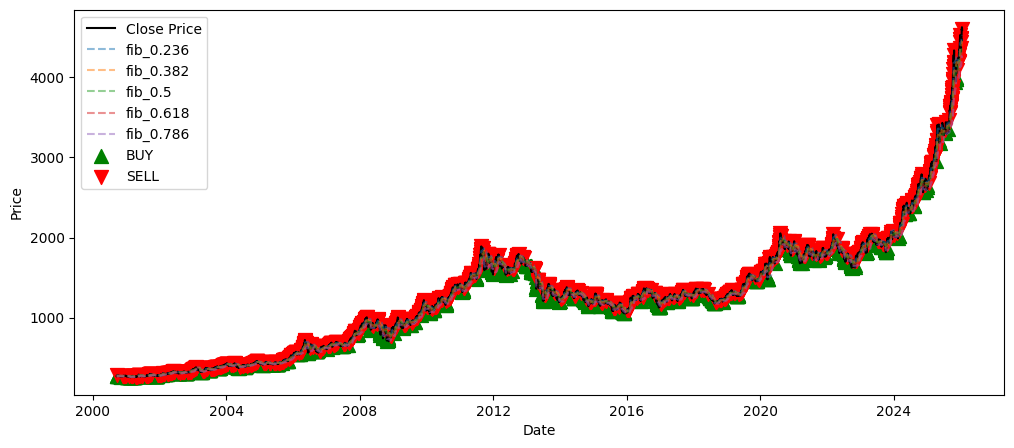

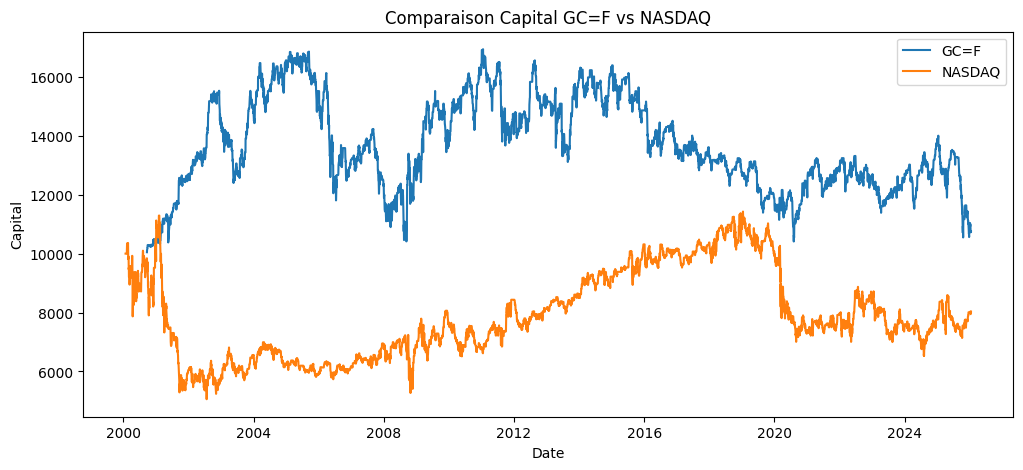

In [2]:
# dashboard_colab.py
# Streamlit dashboard pour pipeline Trading GC=F et NASDAQ (Colab)



import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from step1_pipeline import run_pipeline

st.set_page_config(page_title="Dashboard Trading", layout="wide")
st.title("📊 Dashboard Trading : GC=F et NASDAQ")

# ---------------------------- Helper ----------------------------
def ensure_date_column(df):
    """Assure que le DataFrame a une colonne 'Date' utilisable"""
    if 'Date' not in df.columns:
        df = df.reset_index()  # met l'index dans la colonne
        df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

@st.cache_data(show_spinner=True)
def load_pipeline(symbol):
    """Exécute le pipeline et retourne df et trades"""
    df, trades = run_pipeline(symbol)
    df = ensure_date_column(df)
    trades = ensure_date_column(trades)
    return df, trades

# ---------------------------- Chargement données ----------------------------
symbols = {"GC=F": "Or", "^IXIC": "NASDAQ"}
results = {}
for sym in symbols:
    df, trades = load_pipeline(sym)
    results[sym] = {"df": df, "trades": trades}
    # Export CSV
    df.to_csv(f'trades_{sym.replace("^","").replace("=","")}.csv', index=False)
    trades.to_csv(f'trades_{sym.replace("^","").replace("=","")}_trades.csv', index=False)

# ---------------------------- Sélection marché ----------------------------
market = st.selectbox("Sélectionner le marché", list(symbols.keys()))
df = results[market]["df"]
trades = results[market]["trades"]

st.subheader(f"Tableau des trades : {symbols[market]}")
st.dataframe(trades)

# ---------------------------- Graphique Capital / Equity Curve ----------------------------
st.subheader("💰 Capital / Equity Curve")
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df['Date'], df['capital'], marker='o', label='Capital')
ax.set_xlabel('Date')
ax.set_ylabel('Capital')
ax.set_title(f'Capital évolutif - {symbols[market]}')
ax.legend()
st.pyplot(fig)

# ---------------------------- Graphique RSI et MACD ----------------------------
st.subheader("📈 RSI et MACD")
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)
# RSI
ax[0].plot(df['Date'], df['rsi'], color='blue', label='RSI')
ax[0].axhline(70, color='r', linestyle='--', label='Suracheté')
ax[0].axhline(30, color='g', linestyle='--', label='Survendu')
ax[0].set_ylabel('RSI')
ax[0].legend()
# MACD
ax[1].plot(df['Date'], df['macd'], color='purple', label='MACD')
ax[1].plot(df['Date'], df['macd_signal'], color='orange', linestyle='--', label='MACD Signal')
ax[1].set_ylabel('MACD')
ax[1].legend()
ax[1].set_xlabel('Date')
st.pyplot(fig)

# ---------------------------- Graphique Close + Fibonacci + Signals ----------------------------
st.subheader("📊 Close + Fibonacci + Signals")
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df['Date'], df['Close'], label='Close Price', color='black')
# Fibonacci
for level in ['fib_0.236','fib_0.382','fib_0.5','fib_0.618','fib_0.786']:
    if level in df.columns:
        ax.plot(df['Date'], df[level], linestyle='--', alpha=0.5, label=level)
# BUY / SELL
buys = df[df['signal']=='BUY']
sells = df[df['signal']=='SELL']
ax.scatter(buys['Date'], buys['Close'], marker='^', color='green', s=100, label='BUY')
ax.scatter(sells['Date'], sells['Close'], marker='v', color='red', s=100, label='SELL')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
st.pyplot(fig)

# ---------------------------- Comparaison GC vs NASDAQ ----------------------------
st.subheader("⚖️ Comparaison Capital GC=F vs NASDAQ")
df_gc = results["GC=F"]["df"]
df_nasdaq = results["^IXIC"]["df"]

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_gc['Date'], df_gc['capital'], label='GC=F')
ax.plot(df_nasdaq['Date'], df_nasdaq['capital'], label='NASDAQ')
ax.set_xlabel('Date')
ax.set_ylabel('Capital')
ax.set_title("Comparaison Capital GC=F vs NASDAQ")
ax.legend()
st.pyplot(fig)

st.success("✅ Dashboard prêt et interactif !")
